In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm
#recession data for comparison
brarec = rm.rec_periods('BRARECD')
brarec = brarec.astype(int)

D:\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


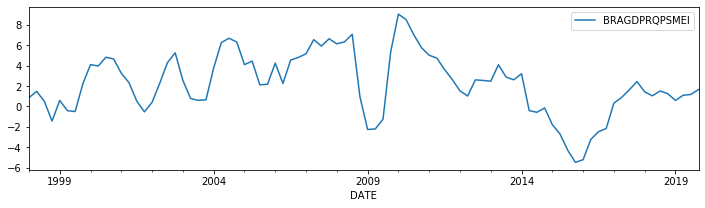

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:            BRAGDPRQPSMEI   No. Observations:                   85
Model:             MarkovAutoregression   Log Likelihood                -153.390
Date:                  Tue, 28 Apr 2020   AIC                            322.779
Time:                          19:00:45   BIC                            342.320
Sample:                      01-01-1998   HQIC                           330.639
                           - 10-01-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1162      0.689      3.070      0.002       0.765       3.467
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0242      0.879      4.576      0.000       2.301       5.748
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.3467      0.318      4.231      0.000       0.723       1.971
ar.L1          1.4234      0.175      8.132      0.000       1.080       1.766
ar.L2         -0.6855      0.295     -2.321      0.020      -1.264      -0.107
ar.L3          0.0750      0.164      0.457      0.648      -0.247       0.397
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8918      0.079     11.348      0.000       0.738       1.046
p[1->0]        0.7499      0.316      2.370      0.018       0.130       1.370
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [2]:
#result, model = SOP_Phase_1('GDPC1', 'fred', datetime(1985,1,1), datetime(2019, 10, 1), 'QS', 'log_mean_ret', 'Markov_Filardo', 2, 4, exog = 'T10Y3M', exog_ret_type = 'log_mean_ret')
#result = SOP_Phase_1('GDP', 'fred', datetime(1980,1,1), datetime(2010, 10, 1), 'QS', 'pct_chg', 'Markov_Hamilton', 2, 4)
br_gdp_chg = rm.pull_data('BRAGDPRQPSMEI', 'fred', datetime(1997,10,1), datetime(2019, 10, 1))
result, model = rm.SOP_Phase_1(br_gdp_chg, 'Markov_Hamilton', 2, 3)
result.summary()

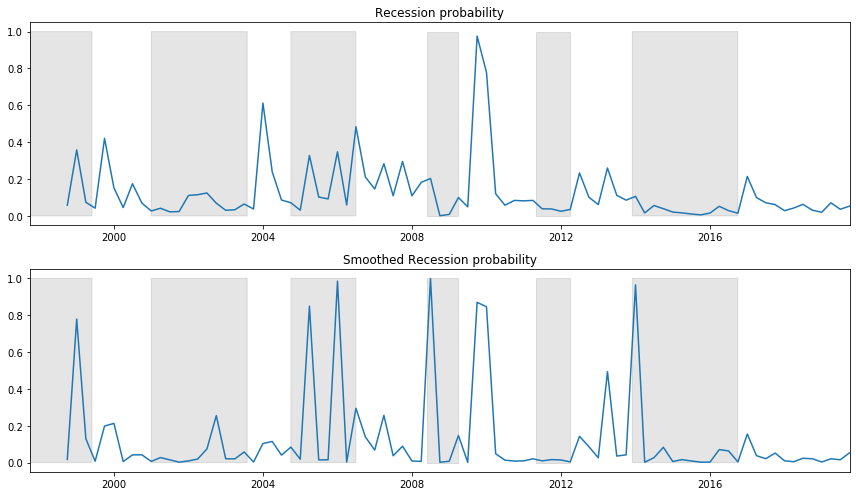

0.6305214769171144
precision =  1.585988799127703
0.7040072793438272
smooth_precision =  1.4204398581390436


In [3]:
rm.rec_prob_graph(result, brarec, datetime(1997,10,1), datetime(2019, 10, 1), invert = True)